In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
'''
Prepare Data
'''
#Stunting Data
print('Read Data..')
df1=pd.read_excel("D:\Python\Python_Project\Outsourced Projects\Datavisualization\Country_Estimates_2021.xlsx",sheet_name='Stunting Proportion (Model)').loc[:605]
df2=pd.read_excel("D:\Python\Python_Project\Outsourced Projects\Datavisualization\Country_Estimates_2021.xlsx",sheet_name='Stunting Numb Affected(Model)').loc[:605]
#Overweight Data
df3=pd.read_excel("D:\Python\Python_Project\Outsourced Projects\Datavisualization\Country_Estimates_2021.xlsx",sheet_name='Overweight Proportion (Model)').loc[:605]
df4=pd.read_excel("D:\Python\Python_Project\Outsourced Projects\Datavisualization\Country_Estimates_2021.xlsx",sheet_name='Overweight Numb Affected(Model)').loc[:605]
print(df1.columns)
# df2.head(3)

Read Data..
Index(['ISO code', 'Country and areas', 'Note', 'Indicator', 'Measure',
       'Estimate', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020 1'],
      dtype='object')


In [106]:
'''
Processing Data
'''
print('Handling Missing Data..')
df1=df1.drop(['Note'],axis=1).dropna()
df2=df2.drop(['Note'],axis=1).dropna()
df3=df3.drop(['Note'],axis=1).dropna()
df4=df4.drop(['Note'],axis=1).dropna()

#
# df1.head(3)

Handling Missing Data..


In [107]:
arr1=df1.loc[0][['2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020 1']].values
arr1=[float(i) for i in arr1]
# arr1

In [108]:
def Detect_Error_Data(df1):
    count=1
    for index in tqdm(range(len(df1))):
        arr1=df1.loc[index][['2000', '2001', '2002', '2003', '2004', '2005', '2006',
           '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
           '2016', '2017', '2018', '2019', '2020 1']].values
        if arr1[0]=='-':
            continue
        arr1=[float(i) for i in arr1]
        random_data=arr1
        c=3
        anomalies = []
        random_data_std = np.std(random_data)
        random_data_mean = np.mean(random_data)
        anomaly_cut_off = random_data_std * c
        lower_limit = random_data_mean - anomaly_cut_off
        upper_limit = random_data_mean + anomaly_cut_off
        #print(lower_limit)
        for outlier in random_data:
            if outlier > upper_limit or outlier < lower_limit:
                anomalies.append(1)
            else:
                anomalies.append(0)
        res4=pd.merge(pd.DataFrame(random_data),pd.DataFrame(anomalies),left_index=True,right_index=True)
        res4.columns=['values','is_outliter']

        for i in range(len(res4)):
            if res4.loc[i]['is_outliter']!=0:
                print('Dctect {} error..'.format(count))
                count=count+1

                print('Country and areas:',df1.loc[index]['Country and areas']\
                      ,'  Estimate:',df1.loc[index]['Estimate'],' Row index:',index,'Year:',2000+i)
print('Detecting error data..')
Detect_Error_Data(df1)
Detect_Error_Data(df2)
Detect_Error_Data(df3)
Detect_Error_Data(df4)

Detecting error data..


 14%|█▍        | 84/606 [00:00<00:01, 350.46it/s]

Dctect 1 error..
Country and areas: Algeria   Estimate: Point Estimate  Row index: 6 Year: 2000
Dctect 2 error..
Country and areas: Algeria   Estimate: Upper Uncertainty Bound  Row index: 8 Year: 2000


 53%|█████▎    | 324/606 [00:00<00:00, 391.76it/s]

Dctect 3 error..
Country and areas: Greece   Estimate: Upper Uncertainty Bound  Row index: 212 Year: 2000
Dctect 4 error..
Country and areas: Iran (Islamic Republic of)   Estimate: Point Estimate  Row index: 249 Year: 2000
Dctect 5 error..
Country and areas: Jordan   Estimate: Lower Uncertainty Bound  Row index: 271 Year: 2020


 80%|███████▉  | 484/606 [00:01<00:00, 373.97it/s]

Dctect 6 error..
Country and areas: Poland   Estimate: Point Estimate  Row index: 426 Year: 2000
Dctect 7 error..
Country and areas: Poland   Estimate: Upper Uncertainty Bound  Row index: 428 Year: 2000
Dctect 8 error..
Country and areas: Seychelles   Estimate: Lower Uncertainty Bound  Row index: 478 Year: 2019
Dctect 9 error..
Country and areas: Seychelles   Estimate: Lower Uncertainty Bound  Row index: 478 Year: 2020


100%|██████████| 606/606 [00:01<00:00, 374.82it/s]


Dctect 10 error..
Country and areas: Viet Nam   Estimate: Upper Uncertainty Bound  Row index: 596 Year: 2000


 28%|██▊       | 169/606 [00:00<00:01, 376.42it/s]

Dctect 1 error..
Country and areas: Bolivia (Plurinational State of)   Estimate: Point Estimate  Row index: 63 Year: 2000


 75%|███████▍  | 453/606 [00:01<00:00, 378.02it/s]

Dctect 2 error..
Country and areas: Marshall Islands   Estimate: Lower Uncertainty Bound  Row index: 334 Year: 2000
Dctect 3 error..
Country and areas: Morocco   Estimate: Lower Uncertainty Bound  Row index: 361 Year: 2020
Dctect 4 error..
Country and areas: Niger   Estimate: Upper Uncertainty Bound  Row index: 389 Year: 2020


100%|██████████| 606/606 [00:01<00:00, 380.50it/s]

Dctect 5 error..
Country and areas: South Sudan   Estimate: Upper Uncertainty Bound  Row index: 503 Year: 2000


In [109]:
print('Processing error data..')
df2.iloc[6]['2000']=df2.iloc[6]['2001']
df2.iloc[8]['2000']=df2.iloc[8]['2001']
df2.iloc[212]['2000']=df2.iloc[212]['2001']
df2.iloc[249]['2000']=df2.iloc[249]['2001']
df2.iloc[271]['2020 1']=df2.iloc[271]['2019']
df2.iloc[426]['2000']=df2.iloc[426]['2001']
df2.iloc[428]['2020 1']=df2.iloc[428]['2018']
df2.iloc[478]['2019']=df2.iloc[478]['2018']
df2.iloc[596]['2000']=df2.iloc[596]['2001']
df4.iloc[63]['2000']=df4.iloc[63]['2001']
df4.iloc[334]['2000']=df4.iloc[334]['2001']
df4.iloc[361]['2020 1']=df4.iloc[361]['2019']
df4.iloc[389]['2020 1']=df4.iloc[389]['2019']
df4.iloc[503]['2000']=df4.iloc[503]['2001']
print('Success..')

Processing error data..
Success..


In [110]:
print('Drop "-" data..')
def drop_2(df1):
    drop_index=[]
    for j in range(len(df1)):
        if df1.loc[j]['2000']=='-':
            drop_index.append(j)
    df1=df1.drop(drop_index,axis=0)
    return df1
df1=drop_2(df1)
df2=drop_2(df2)
df3=drop_2(df3)
df4=drop_2(df4)
print('Success..')
print('Sheet 1 Length:',len(df1),'Sheet 2 Length:',len(df2),'Sheet 3 Length:',len(df3),'Sheet 4 Length:',len(df4))
df1.to_csv('Stunting Proportion (Model).csv')
df2.to_csv('Stunting Numb Affected(Model).csv')
print('Save Stunting Data Successfully..')

Drop "-" data..
Success..
Sheet 1 Length: 465 Sheet 2 Length: 465 Sheet 3 Length: 465 Sheet 4 Length: 465
Save Stunting Data Successfully..


Data Analysis..
Plot Stunting Data..


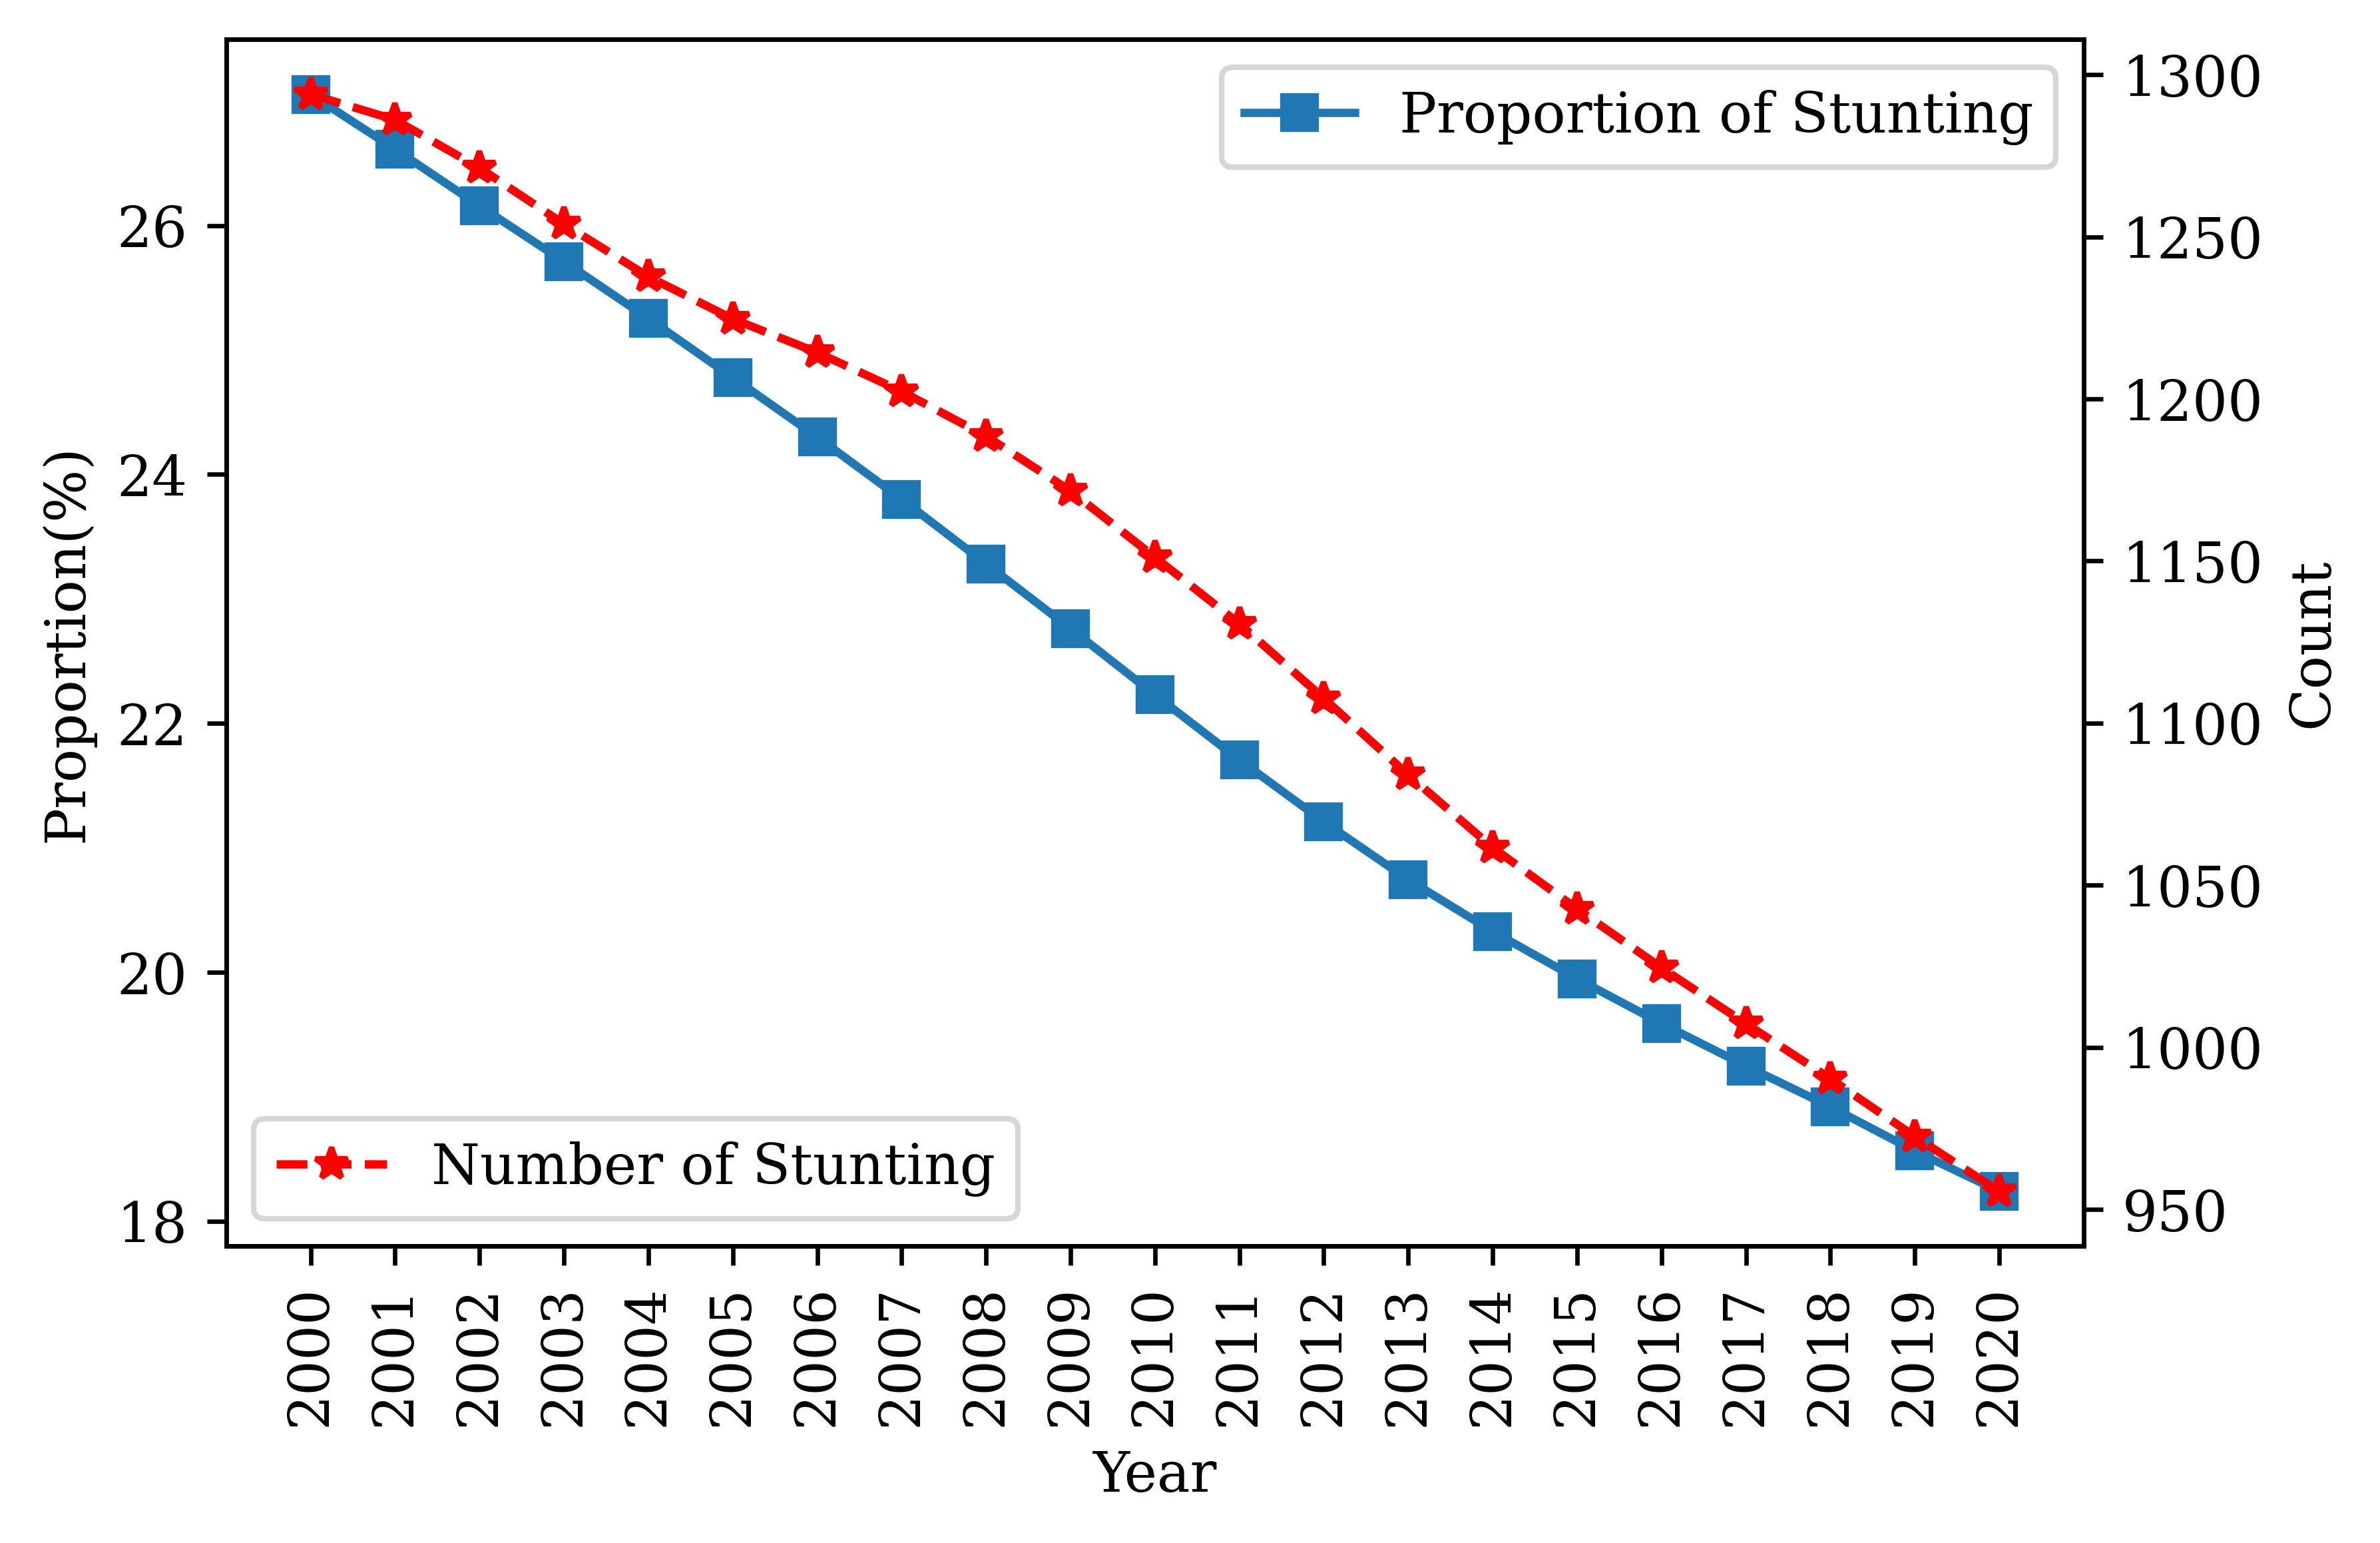

In [111]:
print('Data Analysis..')
'''
Part of Plotting (Total)
'''
def get_data(df1):
    index_list=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
               '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
               '2016', '2017', '2018', '2019', '2020 1']
    value_list=[]
    for index in index_list:
        average=np.mean([float(i) for i in df1[index].values])
        value_list.append(average)
    return value_list
index_list=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
               '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
               '2016', '2017', '2018', '2019', '2020']
plt.rcParams['font.family']='serif'
fig=plt.figure(dpi=600)
ax=fig.add_subplot(111)
plt.plot(index_list,get_data(df1),label='Proportion of Stunting',marker='s')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Proportion(%)')
plt.legend(loc=1)
ax1=ax.twinx()
ax1.plot(index_list,get_data(df2),c='r',marker='*',ls='--',label='Number of Stunting')
ax1.set_ylabel('Count')
plt.legend(loc=3)
plt.savefig('Stunting_figure.jpg')
print('Plot Stunting Data..')

Plot Overweight Data..


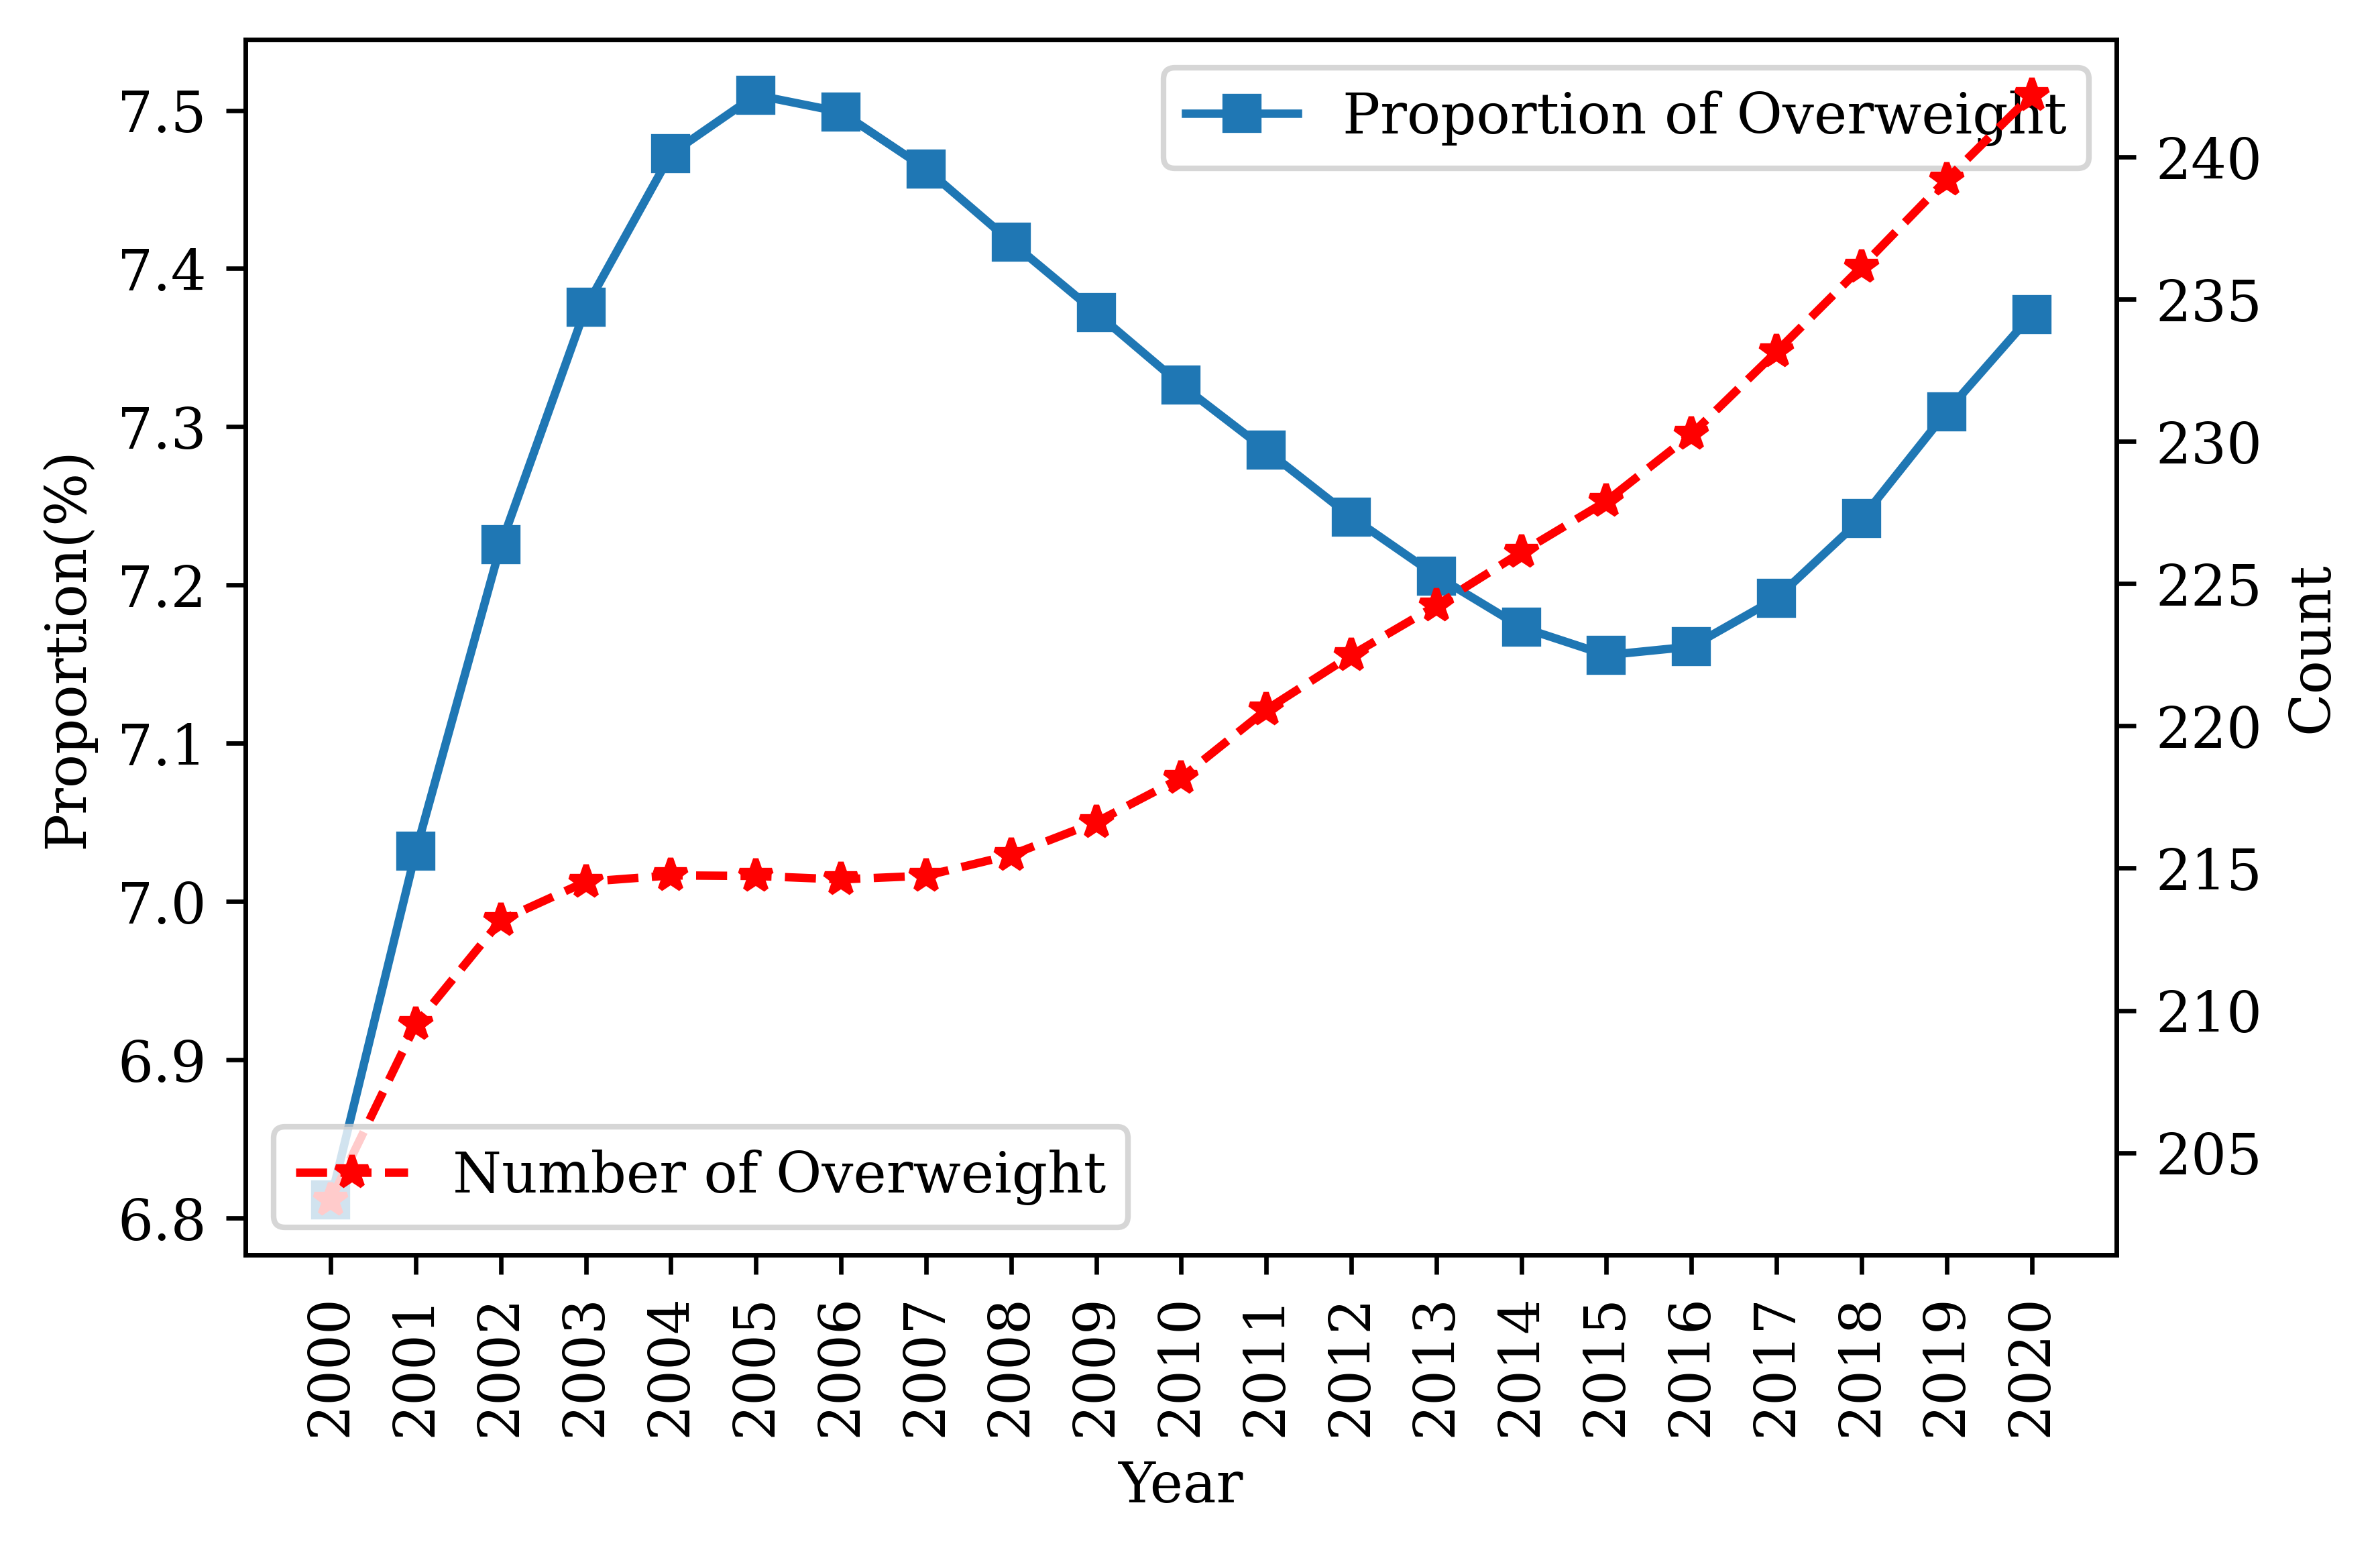

In [112]:
fig=plt.figure(dpi=600)
ax=fig.add_subplot(111)
plt.plot(index_list,get_data(df3),label='Proportion of Overweight',marker='s')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Proportion(%)')
plt.legend(loc=1)
ax1=ax.twinx()
ax1.plot(index_list,get_data(df4),c='r',marker='*',ls='--',label='Number of Overweight')
ax1.set_ylabel('Count')
plt.legend(loc=3)
plt.savefig('Overwight_figure.jpg')
print('Plot Overweight Data..')

In [113]:
'''
Part of Plotting (Each Country)
'''
def compute_each_value_1(df1,index=['2000']):
    label_1=None
    country_index=df1['Country and areas'].value_counts().index
    country_value=[]
    for j in range(len(country_index)):
        each_part=df1[df1['Country and areas']==country_index[j]]

        arr=[float(i) for i in each_part[index].values.reshape(-1)]
        each_ave=np.mean(arr)
        country_value.append(each_ave)
    df=pd.DataFrame({'Country':country_index,'value':country_value})
    label_list=[]
    # print(df.describe())
    for i in range(len(df)):

        if df.loc[i]['value']<13:
            label_1=0
        elif df.loc[i]['value']>=13 and df.loc[i]['value']<27:
            label_1=1
        elif df.loc[i]['value']>=27 and df.loc[i]['value']<40:
            label_1=2
        elif df.loc[i]['value']>=40 :
            label_1=3
        label_list.append(label_1)
    df['label']=label_list

    return df
def compute_each_value_2(df1,index=['2000']):
    label_1=None
    country_index=df1['Country and areas'].value_counts().index
    country_value=[]
    for j in range(len(country_index)):
        each_part=df1[df1['Country and areas']==country_index[j]]

        arr=[float(i) for i in each_part[index].values.reshape(-1)]
        each_ave=np.mean(arr)
        country_value.append(each_ave)
    df=pd.DataFrame({'Country':country_index,'value':country_value})
    label_list=[]
    # print(df.describe())
    for i in range(len(df)):

        if df.loc[i]['value']<4:
            label_1=0
        elif df.loc[i]['value']>=4 and df.loc[i]['value']<6:
            label_1=1
        elif df.loc[i]['value']>=6 and df.loc[i]['value']<6:
            label_1=2
        elif df.loc[i]['value']>=9 :
            label_1=3
        label_list.append(label_1)
    df['label']=label_list

    return df
print('Computing Stunting Data and Division level for Each Country (2020)..')

df1_country=compute_each_value_1(df1,index=['2000'])
df1_country.to_html('Stunting_2000_p_data.html')
df1_2_country=compute_each_value_1(df1,index=['2020 1'])
df1_2_country.to_html('Stunting_2020_p_data.html')
df3_country=compute_each_value_2(df3,index=['2000'])
print('Computing Overweight Data and Division level for Each Country (2020)..')
df3_country.to_html('Overweight_2000_p_data.html')
df3_2_country=compute_each_value_2(df3,index=['2020 1'])
df3_country.to_html('Overweight_2020_p_data.html')

Computing Stunting Data and Division level for Each Country (2020)..
Computing Overweight Data and Division level for Each Country (2020)..


Plot Pie 2000 and 2020..


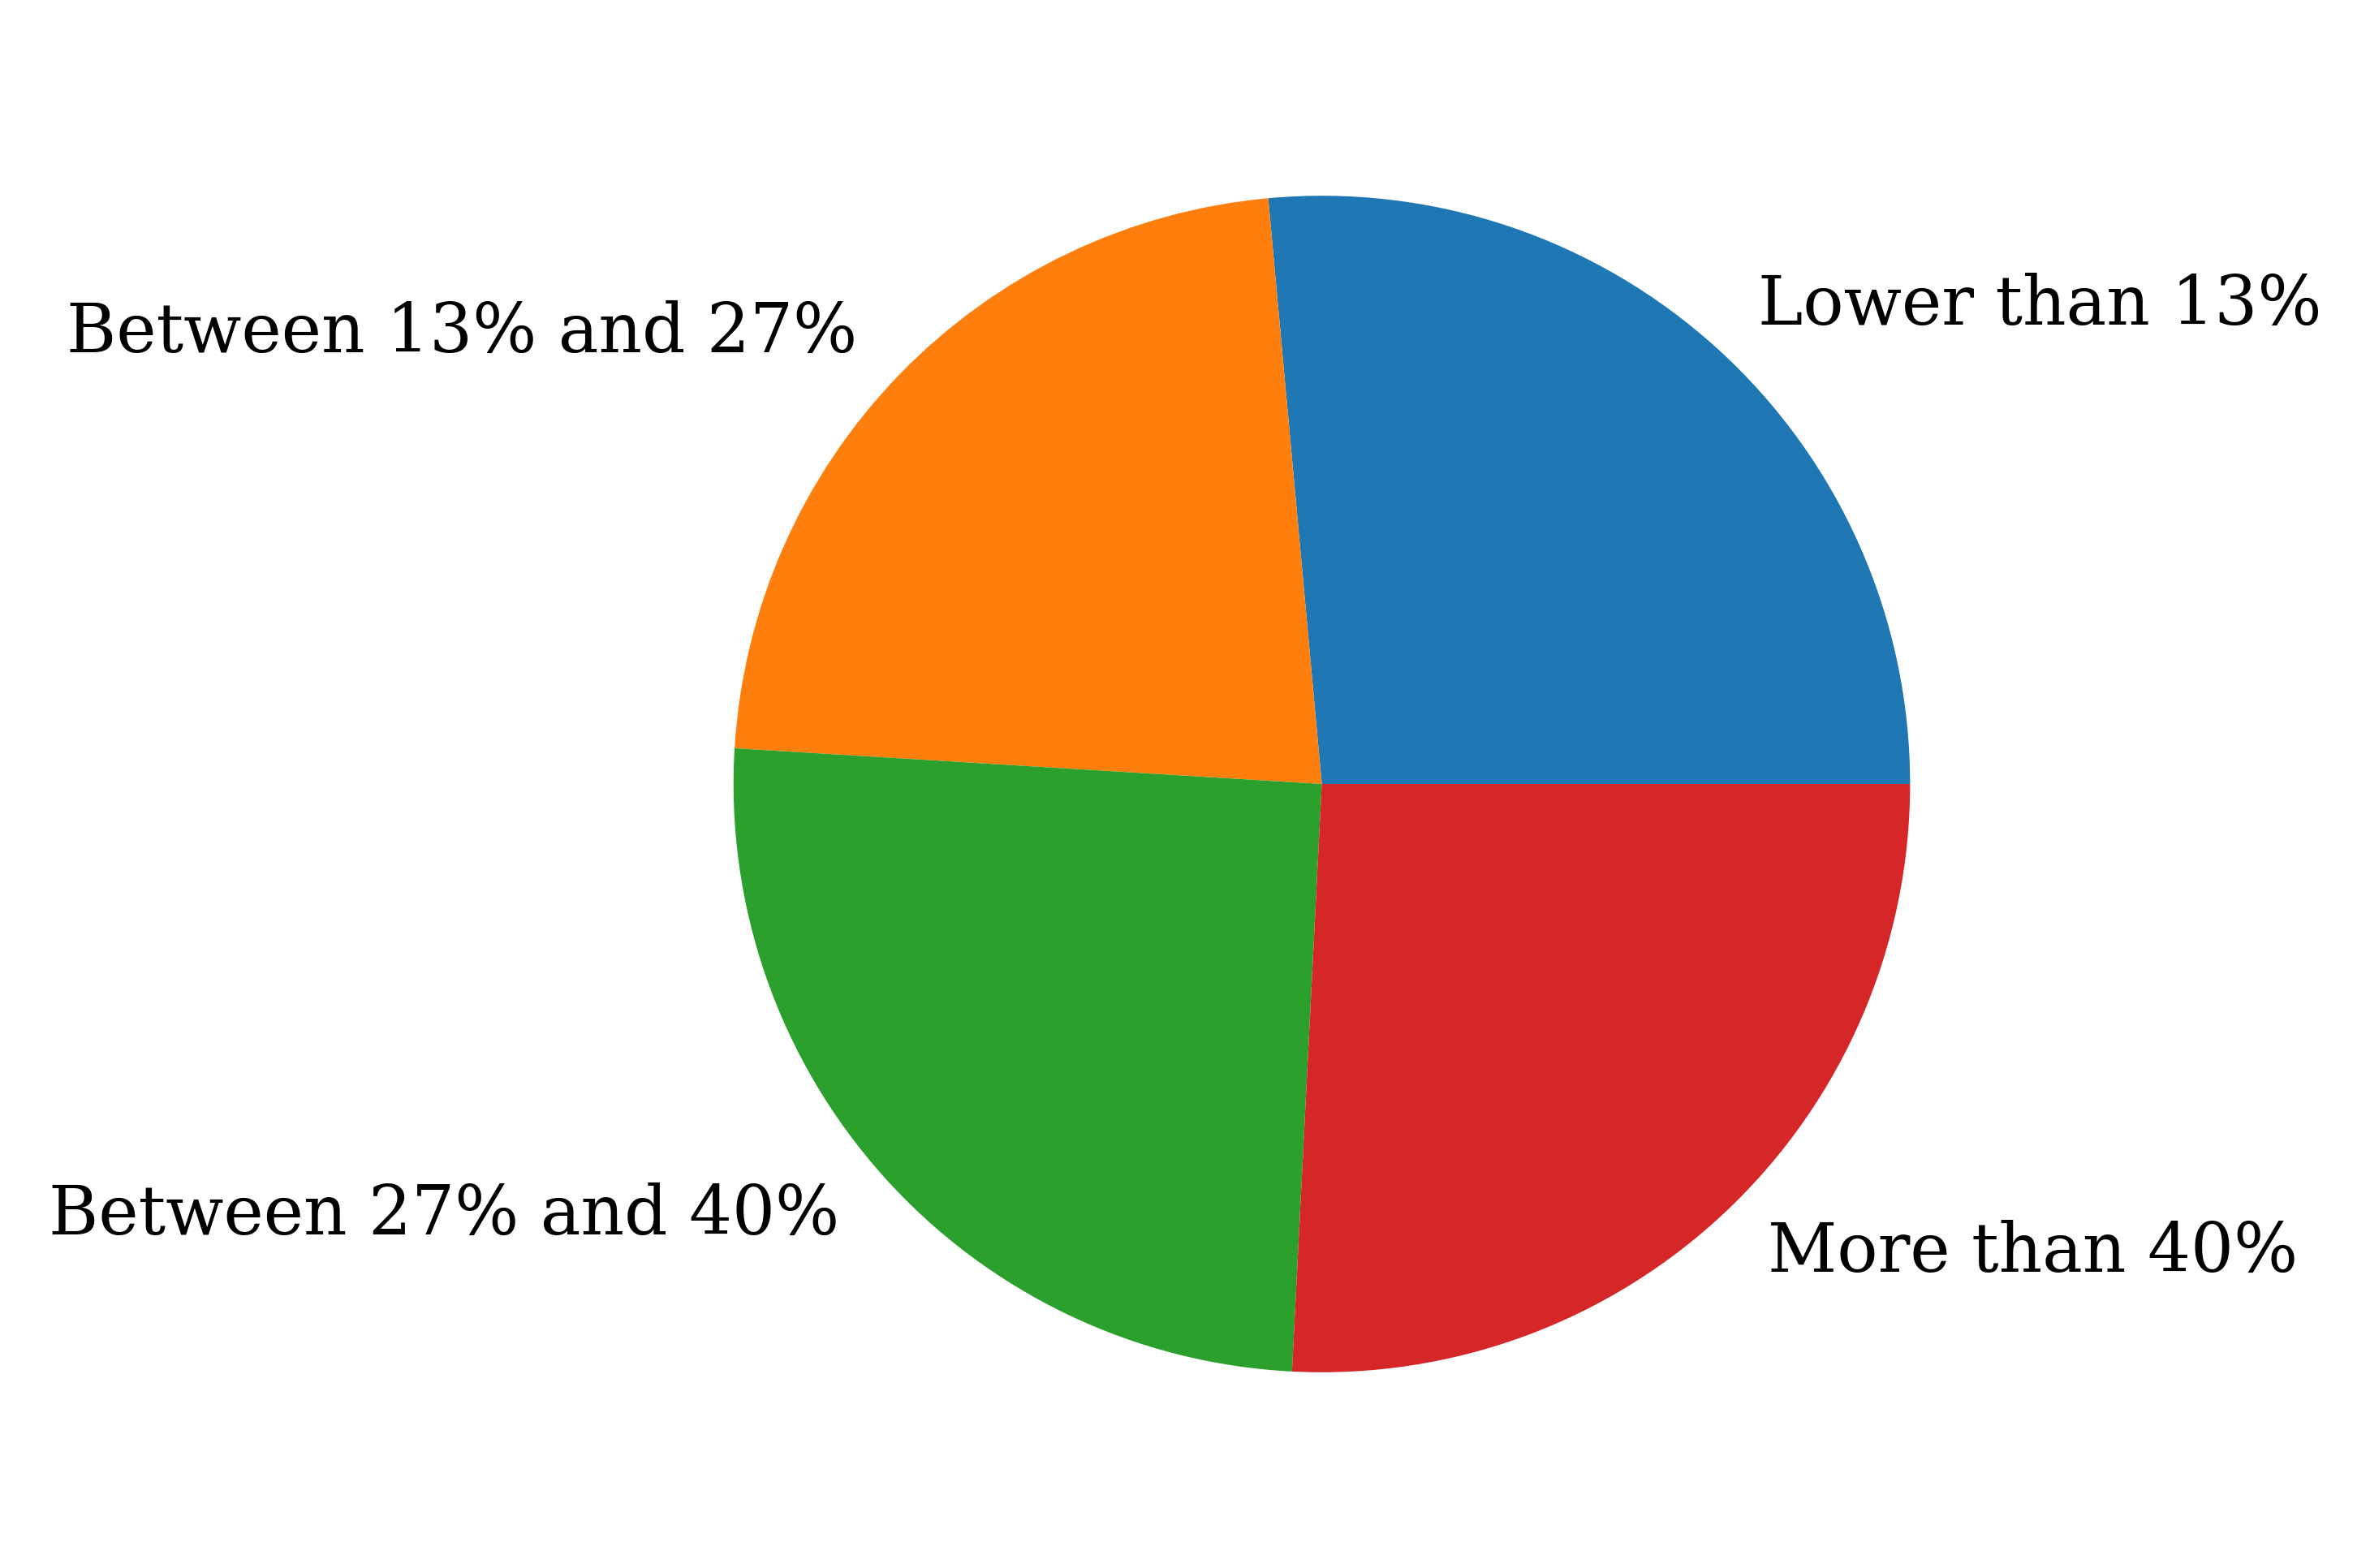

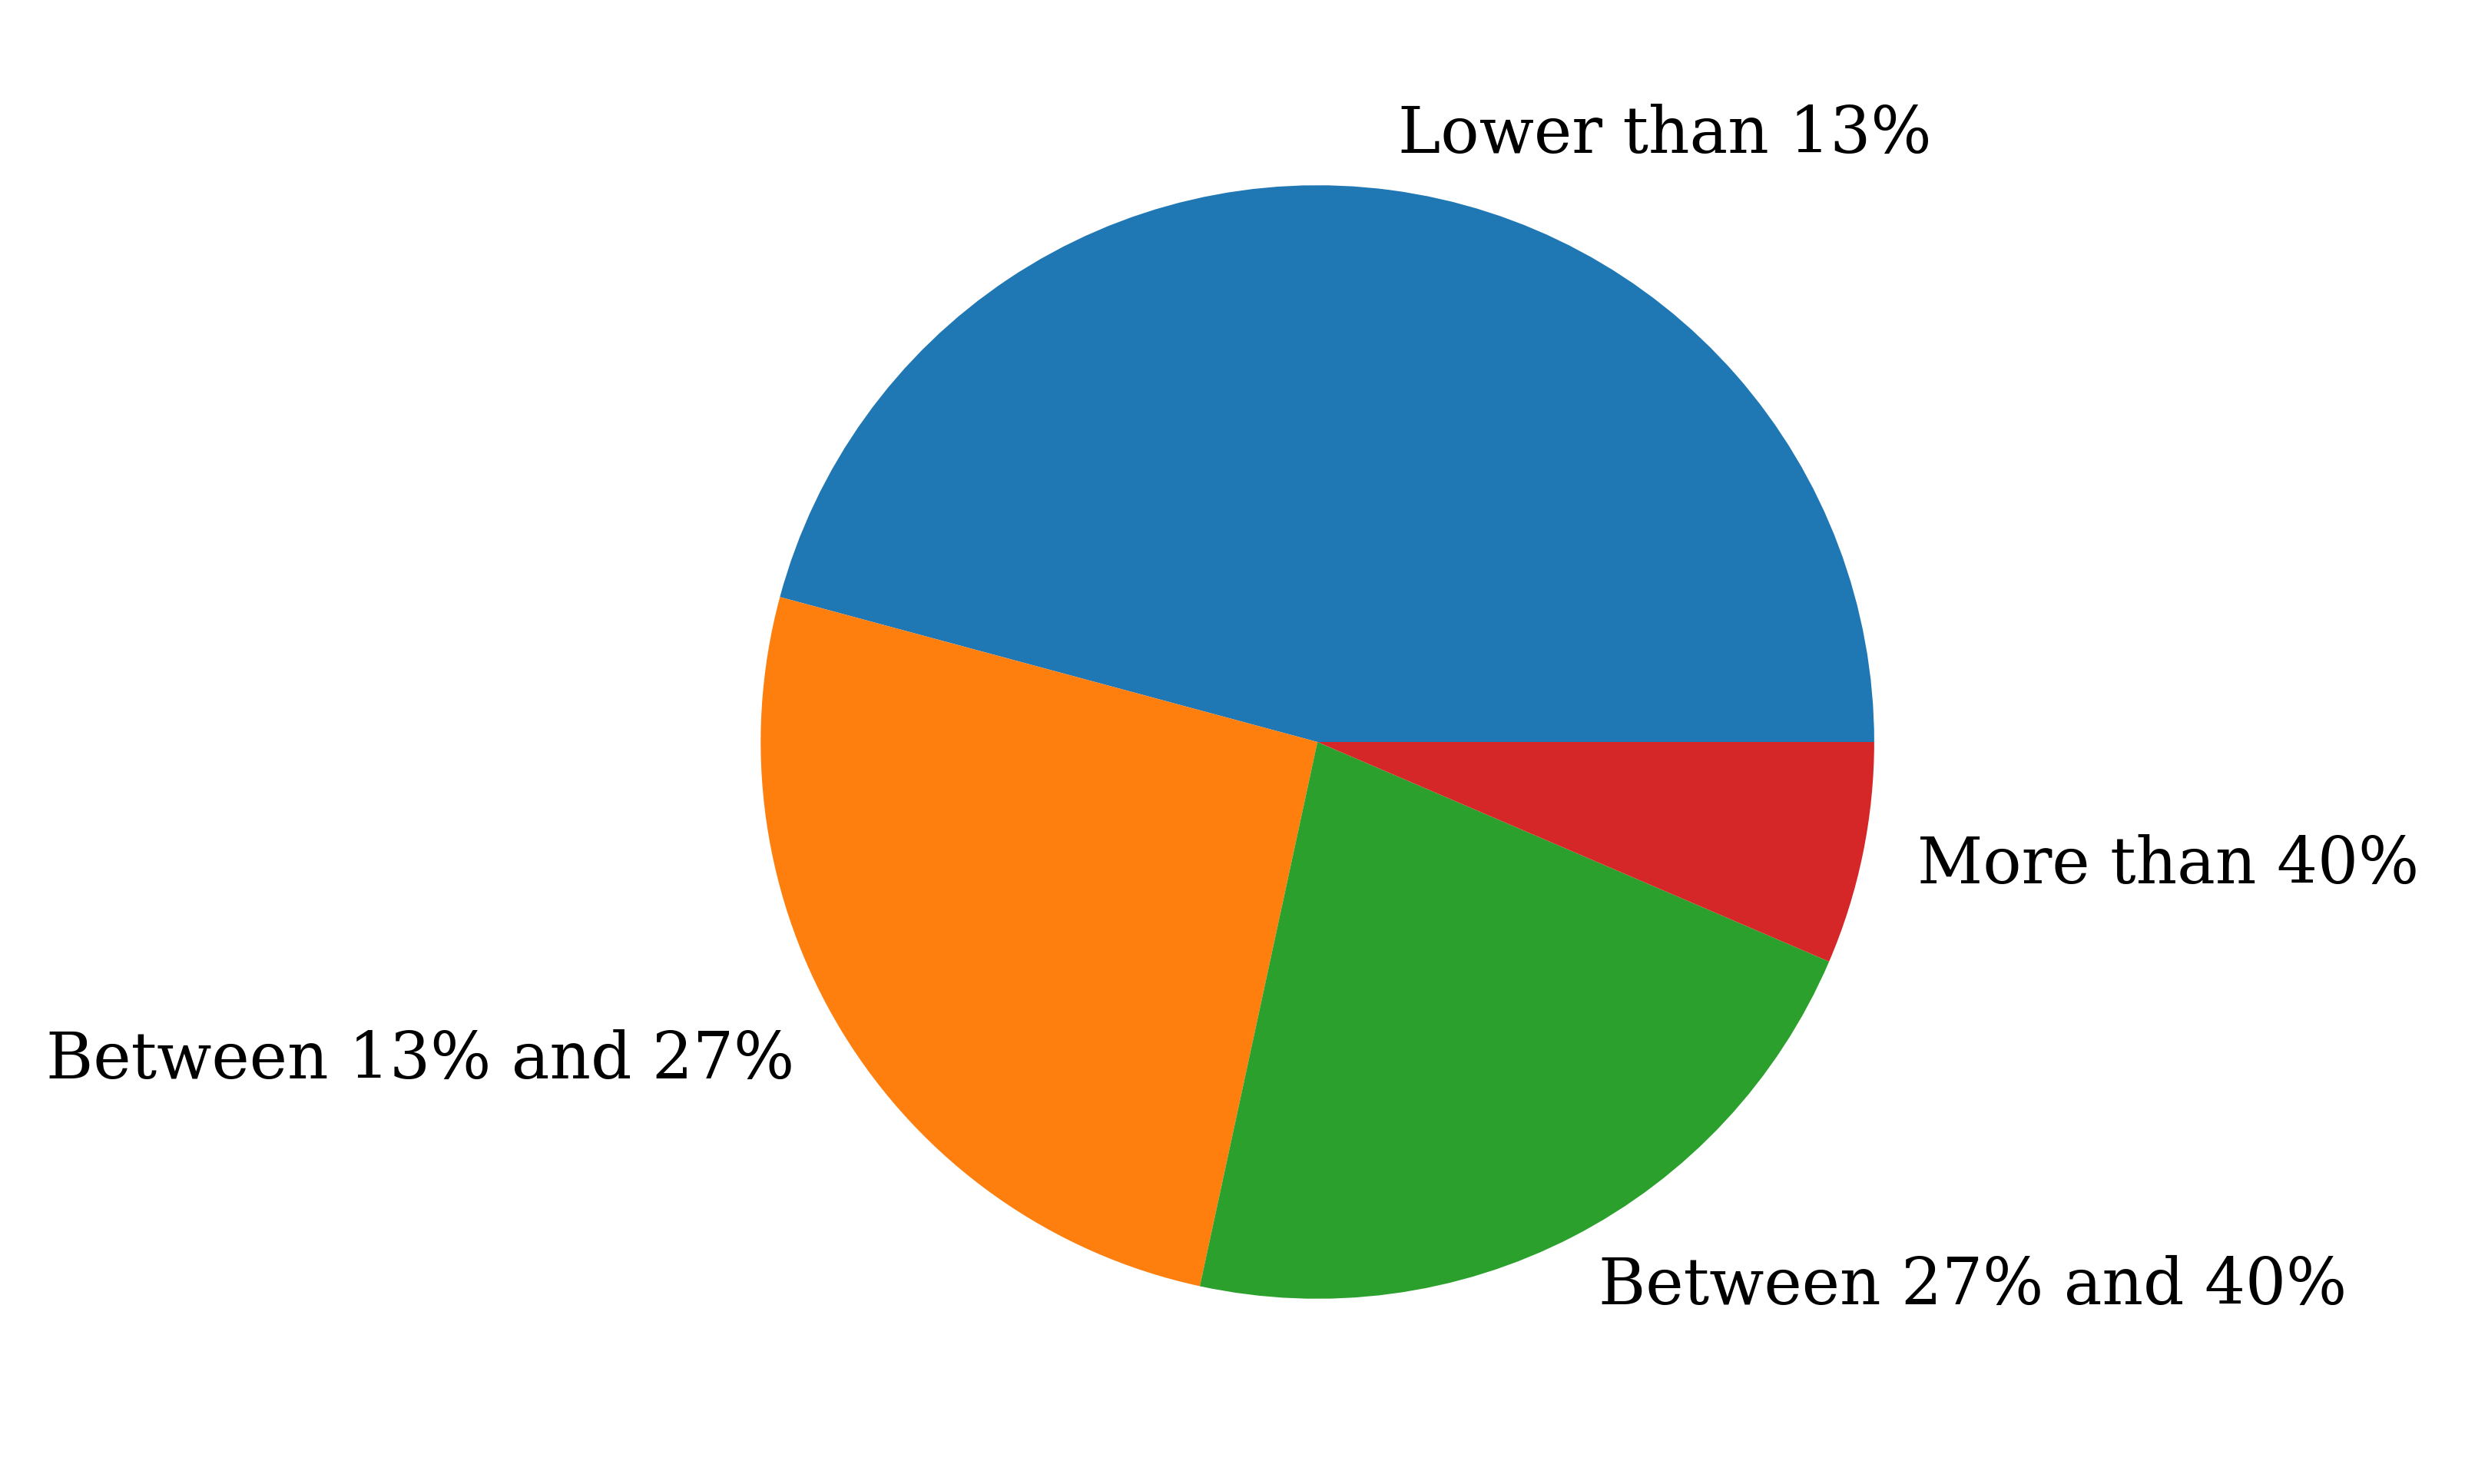

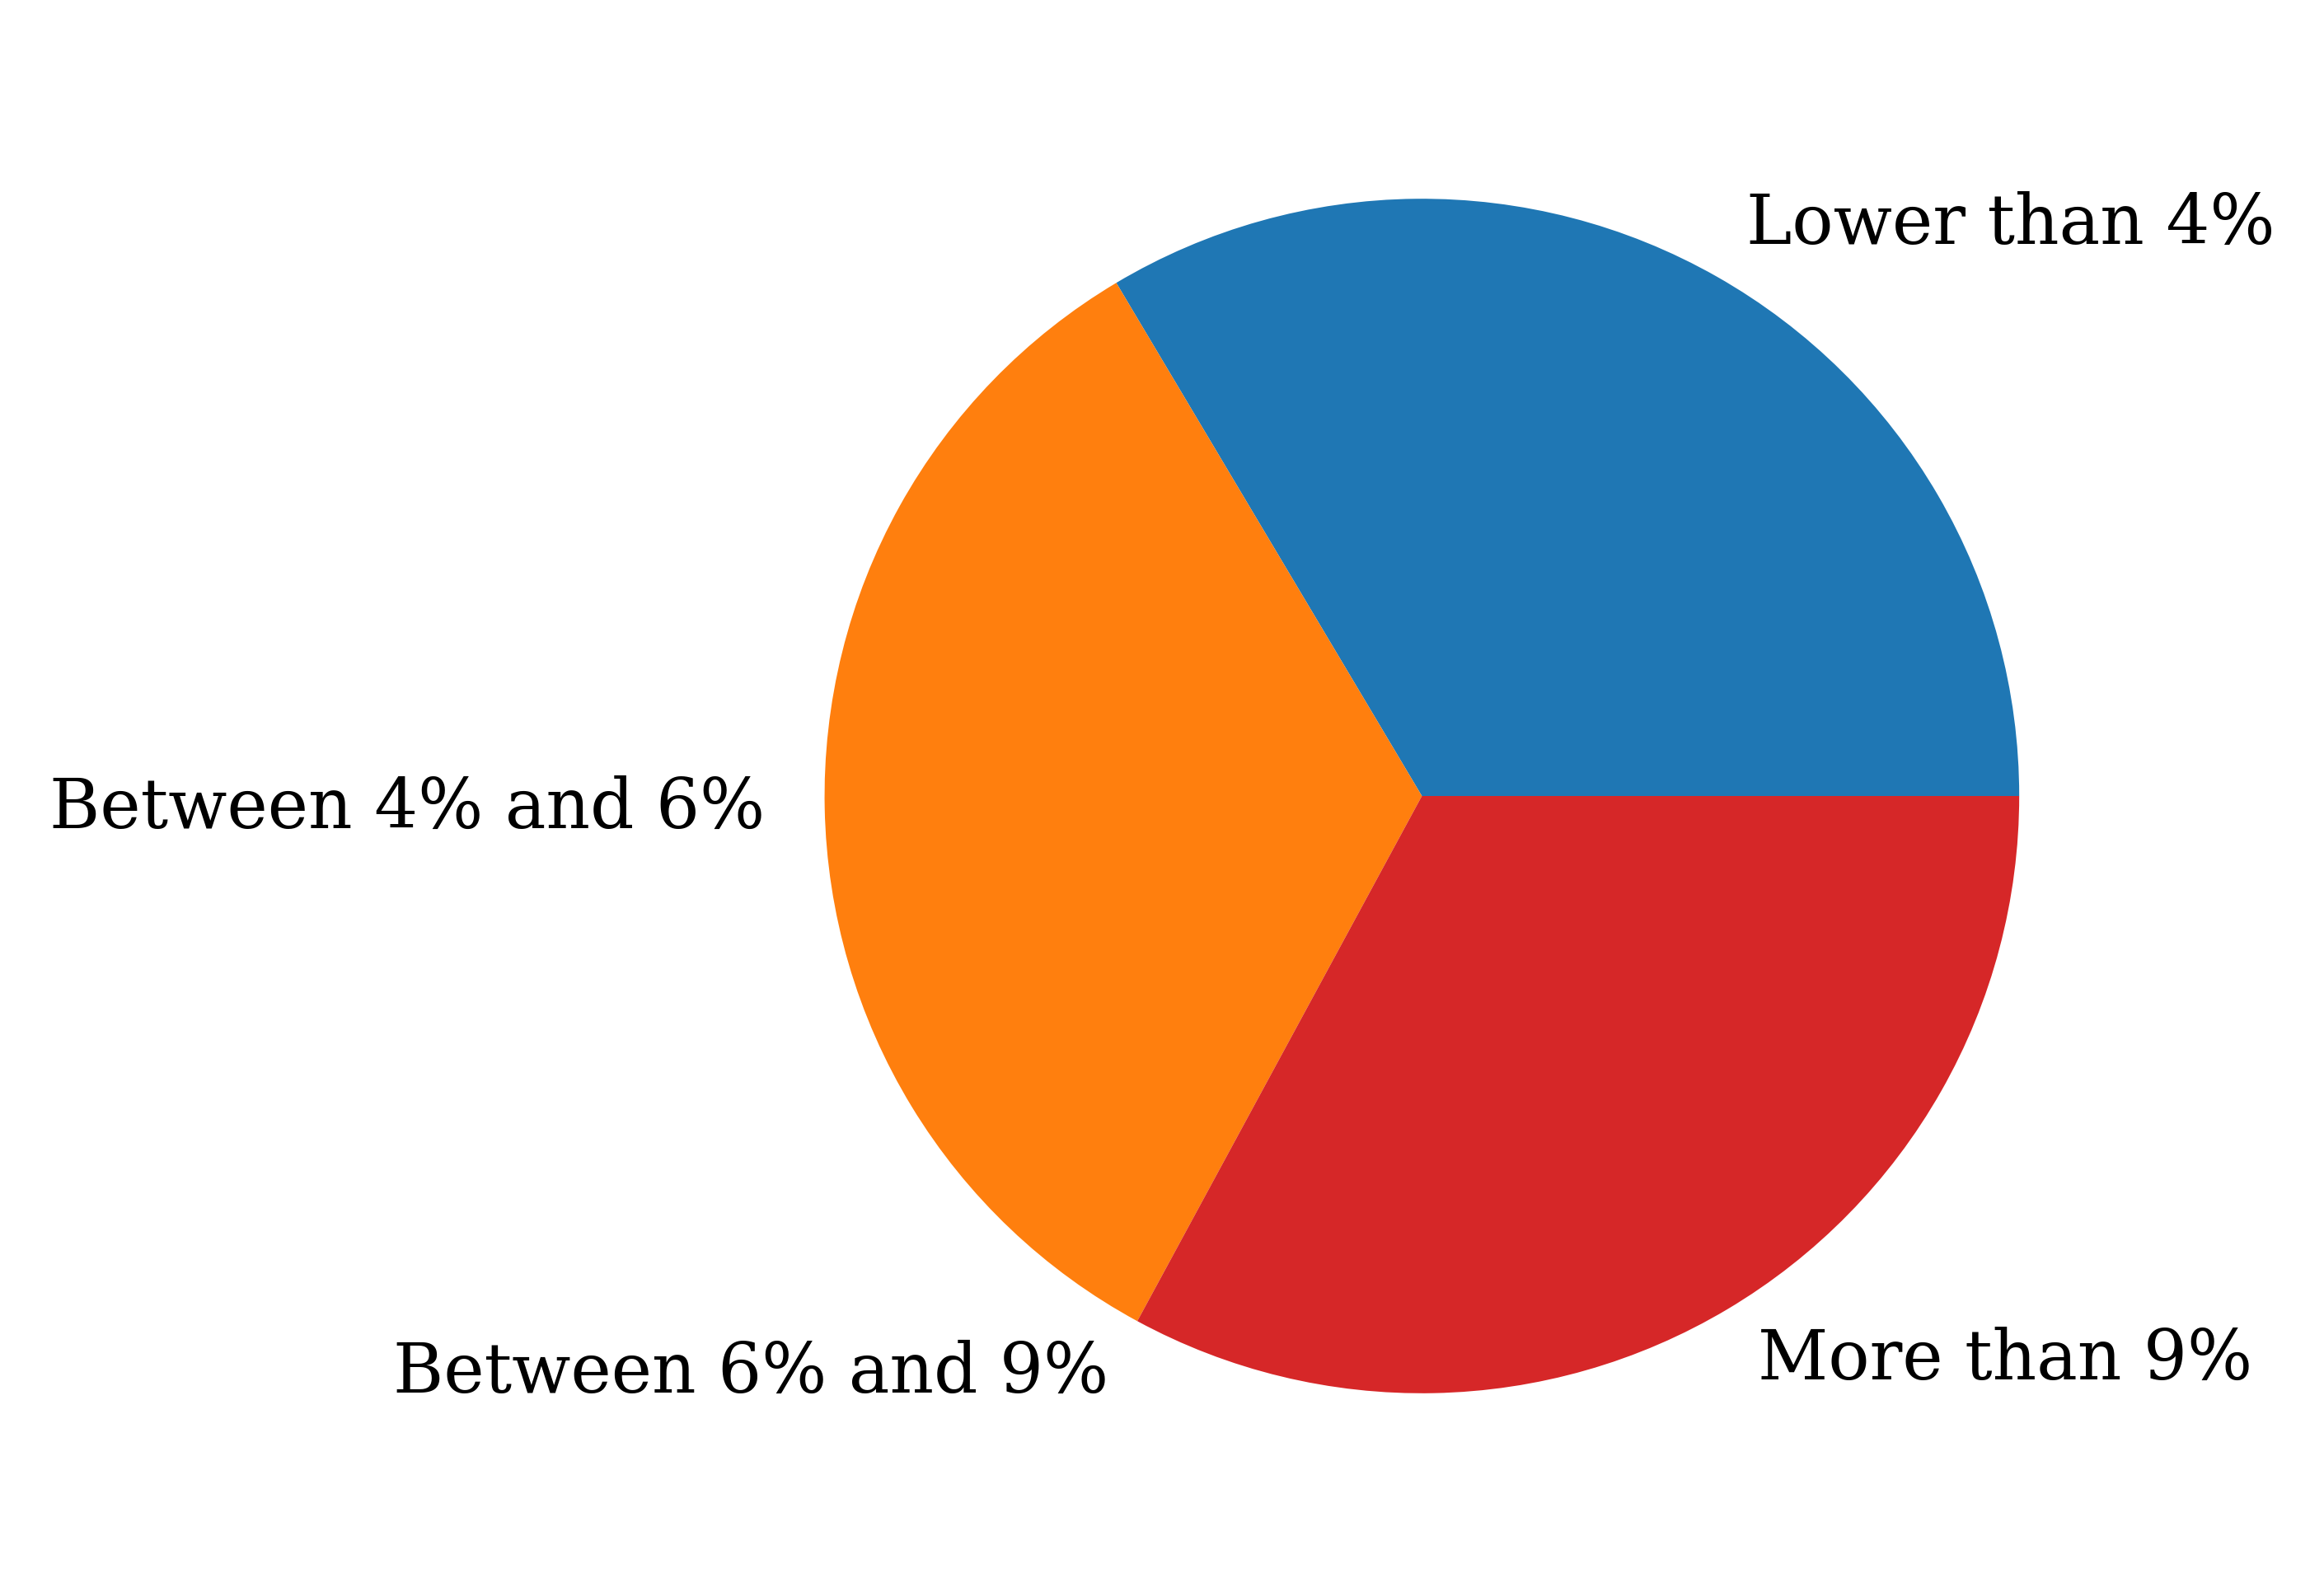

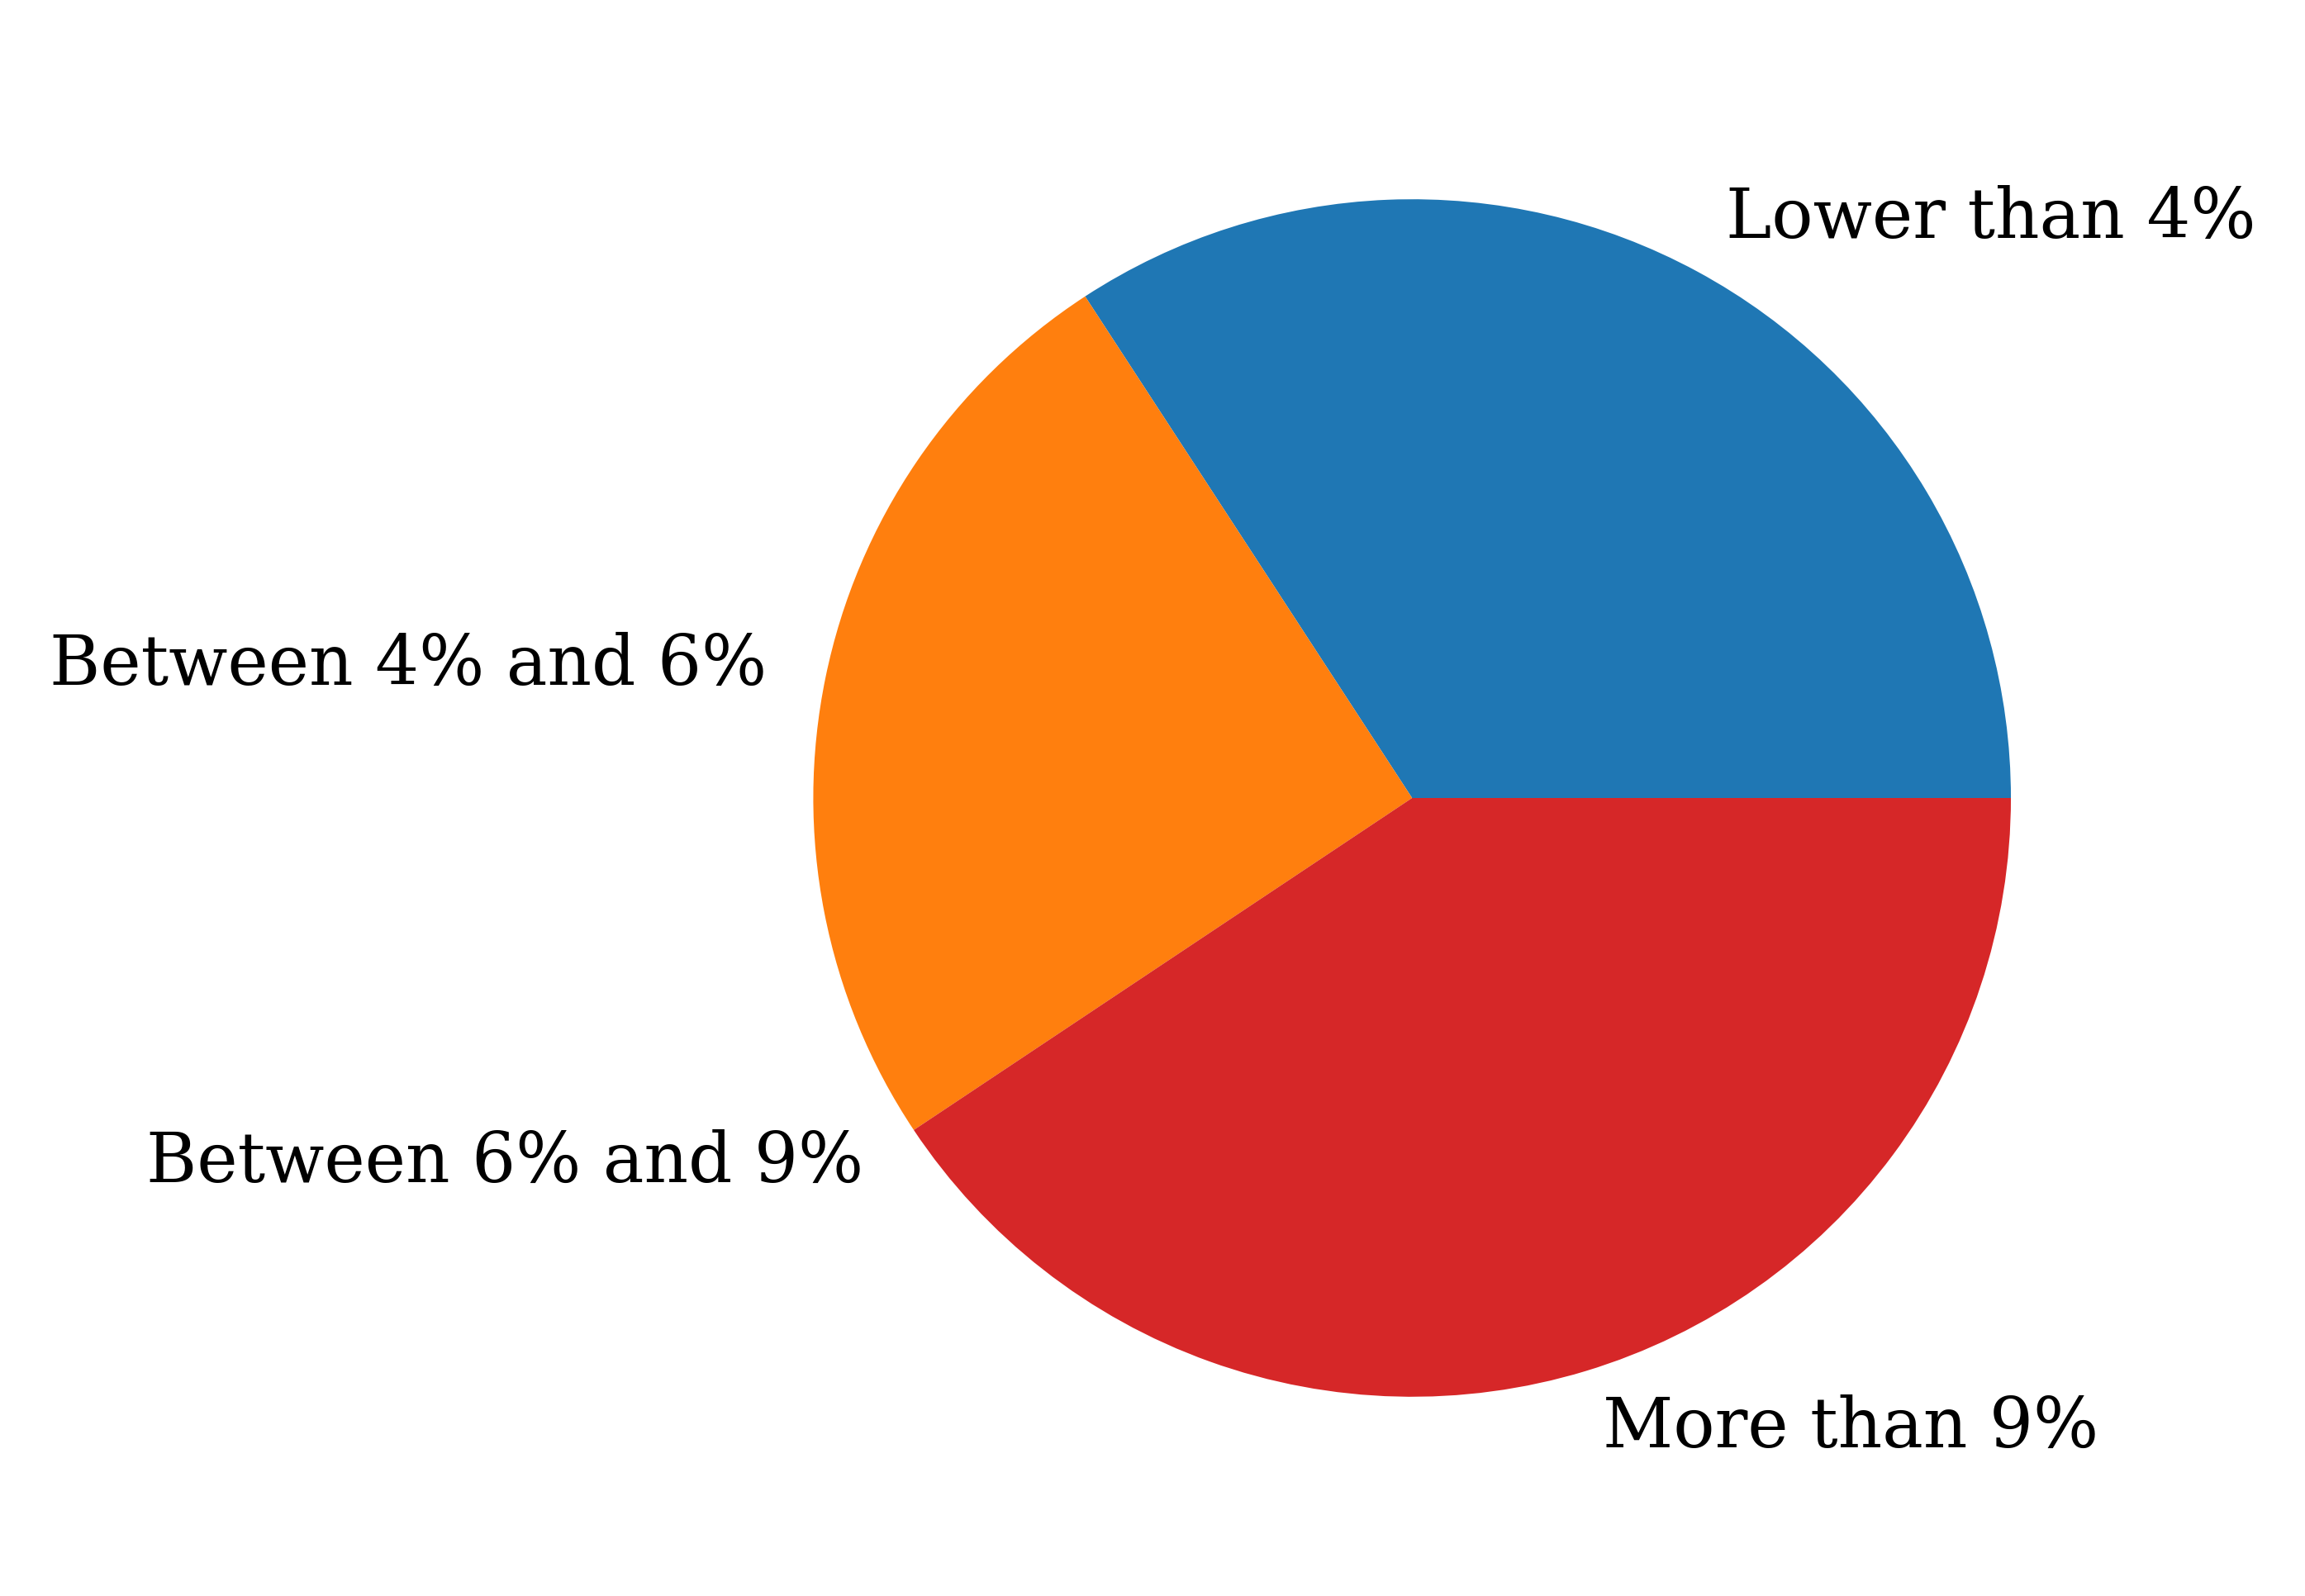

In [114]:
label_list=['Lower than 13%','Between 13% and 27%','Between 27% and 40%','More than 40%']
def plot_pie(df1_country,filename='figure_pie_Stunting_2000.jpg',label_list=label_list):

    value_list=[len(df1_country[df1_country['label']==i]) for i in range(0,4)]
    plt.figure(dpi=600)
    plt.pie(x=value_list,labels=label_list)
    plt.savefig(filename)

print('Plot Pie 2000 and 2020..')
plot_pie(df1_country)
plot_pie(df1_2_country,filename='figure_pie_Stunting_2020.jpg')
label_list=['Lower than 4%','Between 4% and 6%','Between 6% and 9%','More than 9%']
plot_pie(df3_country,label_list=label_list,filename='figure_pie_overweight_2000.jpg')
plot_pie(df3_2_country,label_list=label_list,filename='figure_pie_overweight_2020.jpg')

In [115]:
'''
Pyecharts World Map
'''
print('Preparing Pyecharts..')
def plot_html(df1_country,filename='Stunting_Proportion_world.html',index="Stunting Proportion",figure_title="Stunting Proportion Over the world",max_value=50):
    from pyecharts import options as opts
    from pyecharts.charts import Map
    from pyecharts.faker import Faker
    #%%

    #%%
    world_value=[list(z) for z in zip(df1_country.Country, df1_country.value)]
    #%%
    c = (
        Map()
        .add(index, world_value, "world")
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title=figure_title),
            visualmap_opts=opts.VisualMapOpts(max_=max_value),
        )
        .render(filename)
    )
    print('Plot Successfully..')

'''
Whole
'''
print('Analysis Data of Whole World..')
stunt_t=compute_each_value_1(df1,index=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
                   '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                   '2016', '2017', '2018', '2019', '2020 1'])
plot_html(stunt_t,filename='Stunting_Proportion_world.html',index="Stunting Proportion",figure_title="Stunting Proportion Over the world",max_value=50)
Ow_t=compute_each_value_1(df1,index=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
                   '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                   '2016', '2017', '2018', '2019', '2020 1'])
plot_html(Ow_t,filename='Overweight_Proportion_world.html',index="Overweight Proportion",figure_title="Overweight Proportion Over the world(2020)",max_value=30)

Preparing Pyecharts..
Analysis Data of Whole World..
Plot Successfully..
Plot Successfully..


In [116]:
'''
Compare 2000 and 2020 (for each country)
'''
print('Analysis Data (Proportion and Number) of Each Country..')
plot_html(df1_country,filename='Stunting_Proportion_world2000.html',index="Stunting Proportion",figure_title="Stunting Proportion Over the world(2000)",max_value=50)
plot_html(df1_2_country,filename='Stunting_Proportion_world2020.html',index="Stunting Proportion",figure_title="Stunting Proportion Over the world(2020)",max_value=50)
df2_country=compute_each_value_1(df2,index=['2000'])
plot_html(df2_country,filename='Stunting_Num_world2000.html',index="Stunting Number",figure_title="Stunting Number Over the world(2000)",max_value=10000)
df2_1_country=compute_each_value_1(df2,index=['2020 1'])
plot_html(df2_1_country,filename='Stunting_Num_world2020.html',index="Stunting Number",figure_title="Stunting Number Over the world(2020)",max_value=10000)
'''
Part of Overweight
'''
plot_html(df3_country,filename='Overweight_Proportion_world2000.html',index="Overweight Proportion",figure_title="Overweight Proportion Over the world(2020)",max_value=30)
plot_html(df3_2_country,filename='Overweight_Proportion_world2020.html',index="Overweight Proportion",figure_title="Overweight Proportion Over the world(2020)",max_value=30)
df4_country=compute_each_value_1(df4,index=['2000'])
plot_html(df4_country,filename='Ow_Num_world2000.html',index="Overweight Number",figure_title="Overweight Number Over the world(2000)",max_value=5800)
df4_2_country=compute_each_value_1(df4,index=['2020 1'])
plot_html(df4_2_country,filename='Ow_Num_world2020.html',index="Overweight Number",figure_title="Overweight Number Over the world(2020)",max_value=5800)

Analysis Data (Proportion and Number) of Each Country..
Plot Successfully..
Plot Successfully..
Plot Successfully..
Plot Successfully..
Plot Successfully..
Plot Successfully..
Plot Successfully..
Plot Successfully..


According to the proportion, select the top three countries for data analysis(2000-2020)..
Analysis..
['Burundi', 'Nepal', 'Ethiopia'] are selected..
Plot Successfully..
['Ukraine', 'Albania', 'Libya'] are selected..
Plot Successfully..
Task Finishing..


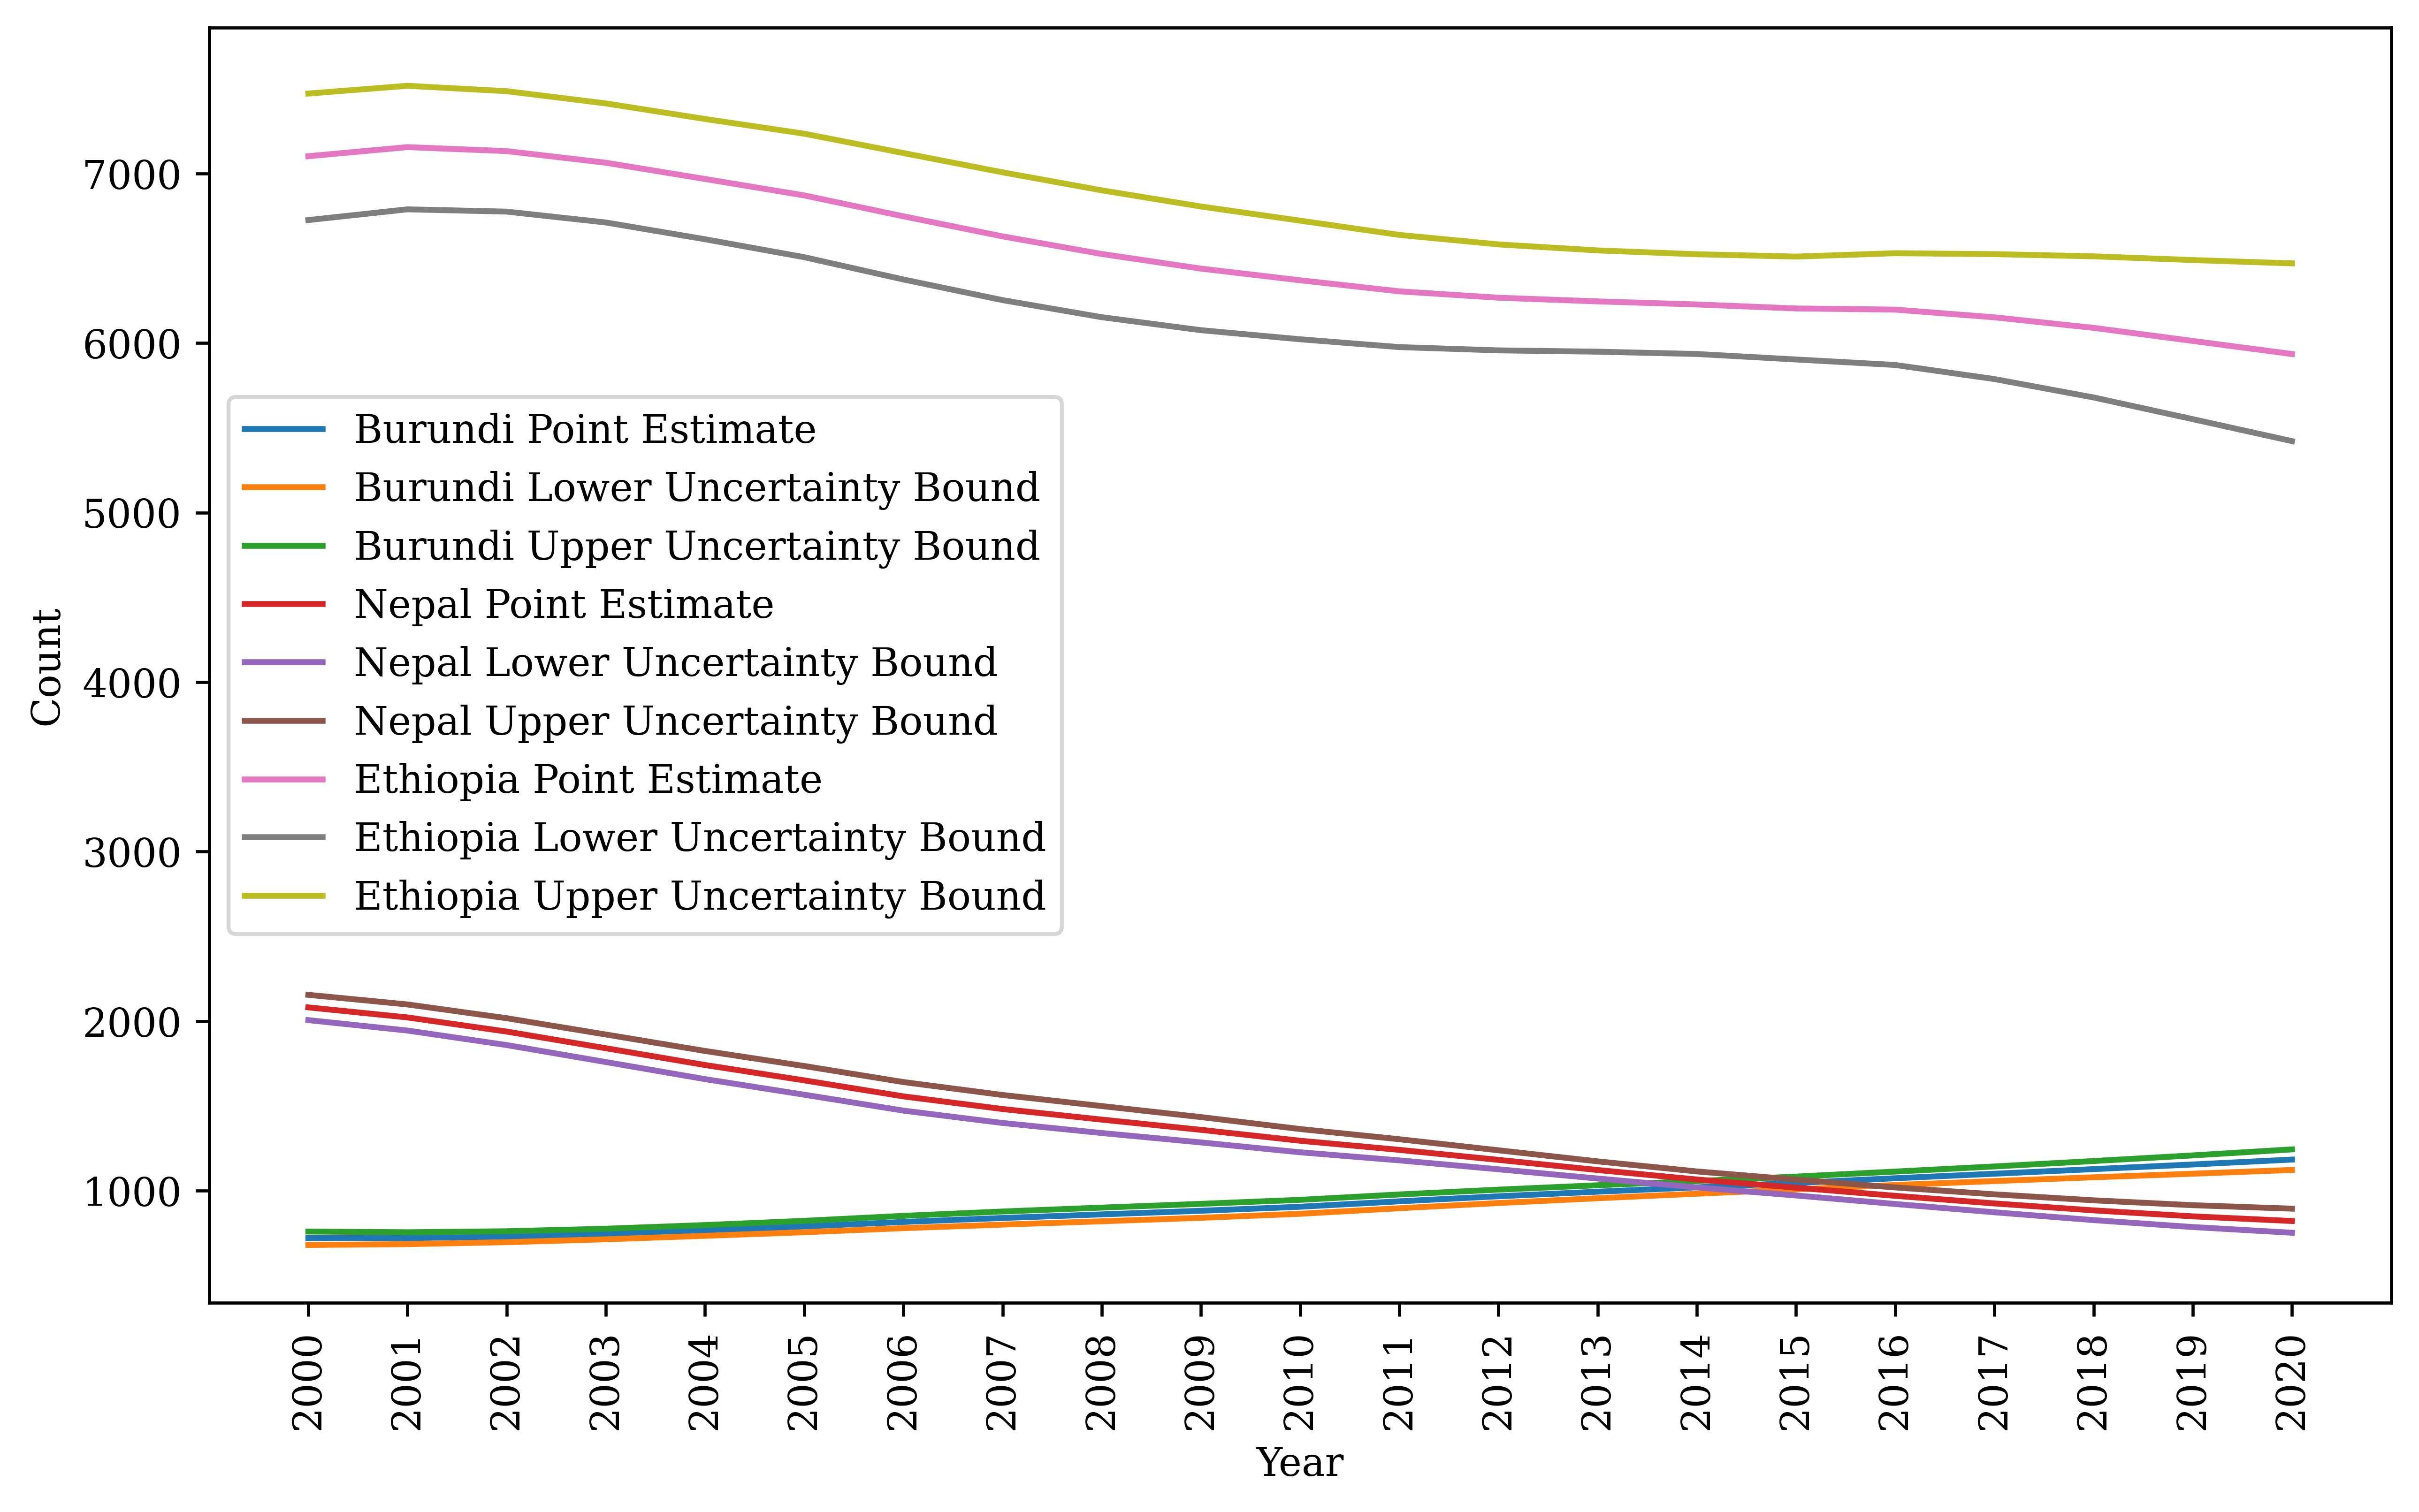

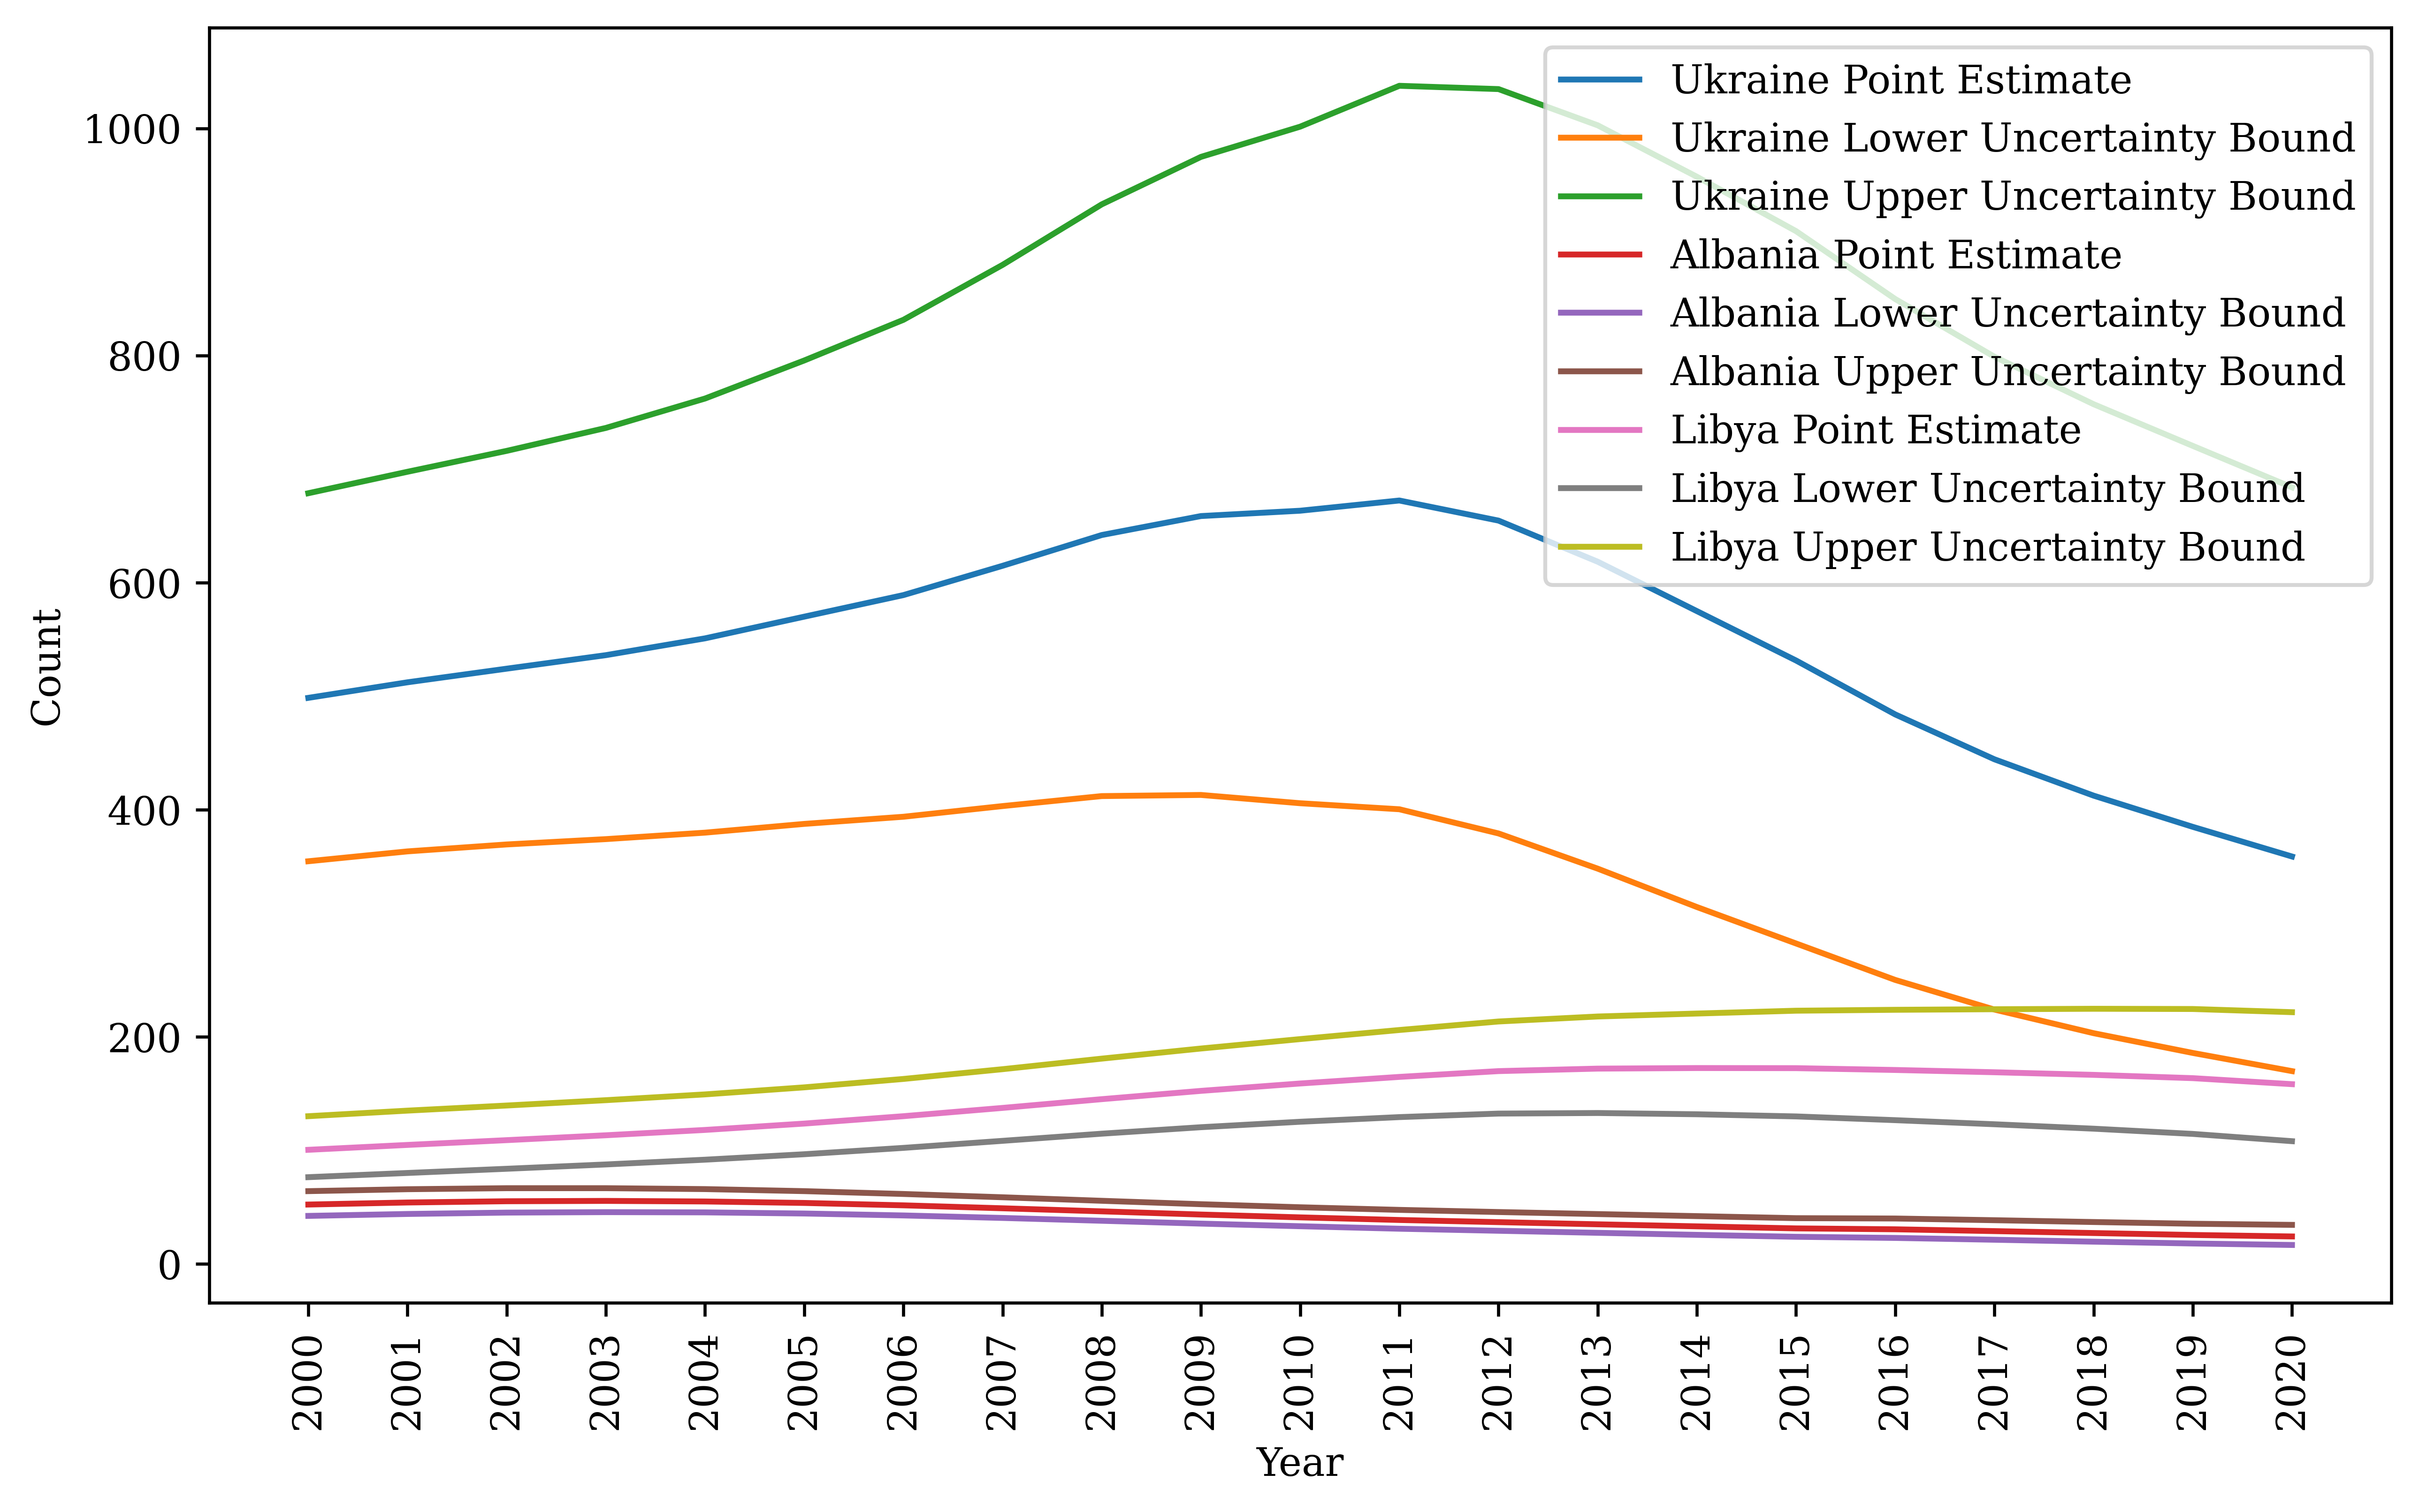

In [117]:
'''
According to the proportion, select the top three countries for data analysis(2000-2020)
'''
print('According to the proportion, select the top three countries for data analysis(2000-2020)..\nAnalysis..')
def plot_3_country(df1_country,df2,filename):
    df1_country.sort_values(by='value',ascending=False)
    stunting_country=df1_country.sort_values(by='value',ascending=False)['Country'].values[:3].tolist()
    print(stunting_country,'are selected..')
    index_list=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
                   '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                   '2016', '2017', '2018', '2019', '2020 1']
    index_list2=['2000', '2001', '2002', '2003', '2004', '2005', '2006',
                   '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
                   '2016', '2017', '2018', '2019', '2020']
    plt.figure(figsize=(10,6),dpi=600)
    for index in stunting_country:
        df1_1=df2[df2['Country and areas']==index]
        df1_1.index=range(len(df1_1))


        for i in range(len(df1_1)):
            plt.plot(index_list2,[float(j) for j in df1_1[index_list].iloc[i].values],label=df1_1.iloc[i]['Country and areas']+' '+df1_1.iloc[i]['Estimate'])
    plt.ylabel('Count')
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(filename)
    print('Plot Successfully..')
plot_3_country(df1_country,df2,filename='Stunting_3_countries.jpg')
plot_3_country(df3_country,df4,filename='Overweight_3_countries.jpg')
print('Task Finishing..')





























